# Исследования для интернет-магазина «Стримчик»

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Цель исследования:
- выявить определяющие успешность игр закономерности
- дать рекомендации для определения потенциально популярного продукта и планирования рекламной кампании

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Ход исследования и основные задачи проекта:
1. описать общую информацию о данных;
2. провести предобработку данных:
- заменить названия столбцов; 
- преобразовать данные в нужные типы и описать, в каких столбцах заменили тип данных и почему;
- обработать пропуски при необходимости:
 - объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
 - описать причины, которые могли привести к пропускам;
 - разобрать значение аббревиатуру 'tbd и описать, как его обработать;
- посчитать суммарные продажи во всех регионах и записать их в отдельный столбец;
3. провести исселодовательский анализ данных:
- сколько игр выпускалось в разные годы;
- как менялись продажи по платформам;
- за какой характерный срок появляются новые и исчезают старые платформы?;
- взять данные за соответствующий актуальный период;
- какие платформы лидируют по продажам, растут или падают? выбрать несколько потенциально прибыльных платформ;
- построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам и описать результат;
- посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами, сформулировать выводы;
- соотнести выводы с продажами игр на других платформах;
- посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?;
4. составить портрет пользователя каждого региона:
- определить для пользователя каждого региона (NA, EU, JP):
 - самые популярные платформы (топ-5), описать различия в долях продаж;
 - самые популярные жанры (топ-5), пояснить разницу;
 - влияет ли рейтинг ESRB на продажи в отдельном регионе?;
5. проверить гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;
6. написать общий вывод по проекту.

### Шаг 1. Загрузка данных

**1.1 Импорт необходимых библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st

**1.2 Загрузка и чтение данных из csv-файла в датафрейм c помощью библиотеки pandas**

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
display(data)
data.info()

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      Rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Дата-сет на данный момент содержит 16715 строк и 11 столбцов.
Исходя из общих данных по дата-сету, видна необходимость предобработки данных, а именно: переименование значений столбцов таблицы для удобной дальнейшей работы, предобработка пропусков в данных о названии игры, платформе, годе выпуска, рейтинге и отзывах критиков и пользователей, а также необходимо изменить тип данных в некоторых столбцах.

### Шаг 2. Предобработка данных

**2.1 Переименование столбцов**

In [4]:
#приводим названия стобцов датафрейма к нижнему регистру
data = data.rename(columns=str.lower)

**2.2 Преобработка дубликатов**

In [5]:
#считаем количество явных дубликатов
data.duplicated().sum()

0

Явных дубликатов не было найдено. Однако стоит проверить совпадения по названию игры, платформе и году выпуска.

In [6]:
data.loc[data.duplicated(['name', 'platform', 'year_of_release'])]

name platform  year_of_release   genre  na_sales  eu_sales  \
14244            NaN      GEN           1993.0     NaN       0.0      0.00   
16230  Madden NFL 13      PS3           2012.0  Sports       0.0      0.01   

       jp_sales  other_sales  critic_score user_score rating  
14244      0.03          0.0           NaN        NaN    NaN  
16230      0.00          0.0          83.0        5.5      E

Было найдено 2 повторяющиеся строки. Было решено обработать только ту строку, которая не содержит пропусков, т.к. другая в процессе дальнейшей обработки, возможно, будет удалена.

Различия данных строк заключаются только в показателях продаж на европейском рынке. В данном случае, мы может прибавить к показателям первой строки показатели второй, а затем удалить вторую строку.

In [7]:
data.loc[(data['name'] == 'Madden NFL 13') & 
    (data['platform'] == 'PS3') & 
    (data['year_of_release'] == 2012)]

name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3           2012.0  Sports      2.11      0.22   
16230  Madden NFL 13      PS3           2012.0  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score user_score rating  
604         0.0         0.23          83.0        5.5      E  
16230       0.0         0.00          83.0        5.5      E

In [8]:
data.loc[data.index == 604, 'eu_sales'] = data.loc[(data['name'] == 'Madden NFL 13') & \
                                                   (data['platform'] == 'PS3'), 'eu_sales'].sum()
data = data.loc[data.index != 16230]

data.loc[(data['name'] == 'Madden NFL 13') & 
    (data['platform'] == 'PS3') & 
    (data['year_of_release'] == 2012)]

name platform  year_of_release   genre  na_sales  eu_sales  \
604  Madden NFL 13      PS3           2012.0  Sports      2.11      0.23   

     jp_sales  other_sales  critic_score user_score rating  
604       0.0         0.23          83.0        5.5      E

**2.3 Просмотр уникальных значений**

In [9]:
def unique_gaps(dataset):
    for column in dataset.columns:
        print('Уникальные значения столбца', column)
        print(dataset[column].unique())
        print('Количество уникальных значений столбца', column)
        print(len(dataset[column].unique()))
        print('Количество пропусков в столбце', column)
        print(dataset[column].isna().sum())

unique_gaps(data)

Уникальные значения столбца name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Количество уникальных значений столбца name
11560
Количество пропусков в столбце name
2
Уникальные значения столбца platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Количество уникальных значений столбца platform
31
Количество пропусков в столбце platform
0
Уникальные значения столбца year_of_release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Количество уникальных значений столбца year_of_release
38
Количество пропусков в столбце year_of_release
269
Уникальные значения столбца genre
['

**2.4 Обработка пропусков**

In [10]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
data = data.dropna(subset=['name'])


Так как в данном датасете представлены игры и их реализация на разных платформах, то у нас появляется возможность заполнить пропуски в данных о годе выпуска игры.

In [12]:
#находим все строки по названию игры, где имеется пропуск в столбце "год релиза"
data.query('year_of_release.isnull()')['name']

183                        Madden NFL 2004
377                       FIFA Soccer 2004
456             LEGO Batman: The Videogame
475             wwe Smackdown vs. Raw 2006
609                         Space Invaders
                       ...                
16373    PDC World Championship Darts 2008
16405                        Freaky Flyers
16448                            Inversion
16458          Hakuouki: Shinsengumi Kitan
16522                         Virtua Quest
Name: name, Length: 269, dtype: object

In [13]:
#отбираем три случайныем игры для того, чтобы убедиться, что мы сможем заполнить некоторые пропуски
display(
    data.query('name == "Madden NFL 2004"'),
    data.query('name == "Inversion"'),
    data.query('name == "Virtua Quest"'),
)

name platform  year_of_release   genre  na_sales  eu_sales  \
183   Madden NFL 2004      PS2              NaN  Sports      4.26      0.26   
1881  Madden NFL 2004       XB           2003.0  Sports      1.02      0.02   
3889  Madden NFL 2004       GC           2003.0  Sports      0.40      0.10   
5708  Madden NFL 2004      GBA           2003.0  Sports      0.22      0.08   

      jp_sales  other_sales  critic_score user_score rating  
183       0.01         0.71          94.0        8.5      E  
1881      0.00         0.05          92.0        8.3      E  
3889      0.00         0.01          94.0        7.7      E  
5708      0.00         0.01          70.0        6.6      E

name platform  year_of_release    genre  na_sales  eu_sales  \
12146  Inversion      PS3           2012.0  Shooter      0.03      0.03   
12678  Inversion     X360           2012.0  Shooter      0.03      0.02   
16448  Inversion       PC              NaN  Shooter      0.01      0.00   

       jp_sales  other_sales  critic_score user_score rating  
12146       0.0         0.01          56.0        5.4      M  
12678       0.0         0.01          53.0        6.5      M  
16448       0.0         0.00          59.0        6.7      M

name platform  year_of_release         genre  na_sales  \
15754  Virtua Quest      PS2              NaN  Role-Playing      0.01   
16522  Virtua Quest       GC              NaN  Role-Playing      0.01   

       eu_sales  jp_sales  other_sales  critic_score user_score rating  
15754      0.01       0.0          0.0          53.0        7.6      T  
16522      0.00       0.0          0.0          55.0        5.5      T

In [14]:
#заменяем пропуски в столбце "год релиза" для каждой повторяющейся игры 
for i in data[data['year_of_release'].isnull() == True].index:  
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()

/tmp/ipykernel_116/366656251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()


In [15]:
data['year_of_release'].isna().sum()

146

До работы над пропусками в данном столбце их количество составляло 269, после предобработки - 146. Таким образом мы смогли заменить восполнить почти половину пропусков.

Количество пропусков, которые нам не удалось обработать, достаточно мало, чтобы их удаление из датасета повлияло на дальнейший анализ. Поэтому, их стоит удалить.

In [16]:
data = data.dropna(subset=['year_of_release'])

Проверяем количество оставших пропусков в дургих столбцах.

In [17]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         6633
rating             6699
dtype: int64

Количество пропусков в данных об оценках пользователей и критиков, а также рейтинге игры слишком велико, чтобы удалить все пропуски, поэтому их следует обработать. Однако, обработке могут подлежать некоторые данные из стобца "оценки пользователей" и "рейтинг". В основном, пропуске в столбце с оценкой лучше оставить нетронутыми, так как мы не можем заменить их на какой-либо логичный или устредненный показатель.

При просмотре уникальных значений в столбце "оценка пользователей" присутствует непредполагаемое значение "tbd". 
В игровой сфере расшивровка данной аббревиатуры может быть - To Be Determined, то есть "Будет определено". Стоит отметить также, что у этой аббревиатуры могут быть и иные значения, например To Be Done - должно быть сделано, или To Be Discussed - подлежит обсуждению. 

Мы можем сделать вывод, что при данном значении, выпущеная игра еще не получила оценки пользователей. Данный показать следует заменить на пропуск.

In [18]:
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

Обращая внимания на уникальные значения в столбце "рейтинг", мы видим некоторые особенности:
1. все значения с расшифровкой по данным Entertainment Software Rating Board (ESRB):
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults")
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу
2. Значение "K-A" присутствует в датасете и может быть заменено на современный аналог "E"
3. Пропуски мы не можем заменить, их следует переименовать, чтобы не удалять большую часть данных.

In [19]:
data['rating'] = ( data['rating']
                      .fillna('Unknown')
                      .replace('K-A', 'E')
                     )

**2.5 Изменение типы данных в столбцах**

In [20]:
#заменяем тип данных в "year_of_release" на целые числа и тип данных int64
data['year_of_release'] = data['year_of_release'].astype(int)

In [21]:
#заменяем тип данных в "user_score" на числовойтип данных float64, т.к. теперь там отсутствуют строки. 
data['user_score'] = data['user_score'].astype(float)

In [22]:
#проверям правильность предыдущих кодов
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16566 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16566 non-null  object 
 1   platform         16566 non-null  object 
 2   year_of_release  16566 non-null  int64  
 3   genre            16566 non-null  object 
 4   na_sales         16566 non-null  float64
 5   eu_sales         16566 non-null  float64
 6   jp_sales         16566 non-null  float64
 7   other_sales      16566 non-null  float64
 8   critic_score     8074 non-null   float64
 9   user_score       7539 non-null   float64
 10  rating           16566 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**2.6 Подсчет суммарных продажи во всех регионах**

In [23]:
data['total_sales'] =  data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [24]:
data = data.reset_index(drop=True)

In [25]:
data

name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16561  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16562               LMA Manager 2007     X360             2006        Sports   
16563        Haitaka no Psychedelica      PSV             2016     Adventure   
16564               Spirits & Spells      GBA             2003      Platform   
16565            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77           NaN         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16561      0.00      0.00      0.01         0.00           NaN         NaN   
16562      0.00      0.01      0.00         0.00           NaN         NaN   
16563      0.00      0.00      0.01         0.00           NaN         NaN   
16564      0.01      0.00      0.00         0.00           NaN         NaN   
16565      0.00      0.00      0.01         0.00           NaN         NaN   

        rating  total_sales  
0            E        82.54  
1      Unknown        40.24  
2            E        35.52  
3            E        32.77  
4      Unknown        31.38  
...        ...          ...  
16561  Unknown         0.01  
16562  Unknown         0.01  
16563  Unknown         0.01  
16564  Unknown         0.01  
16565  Unknown         0.01  

[16566 rows x 12 columns]

В ходе предобработки данных была проведена работы с дубликатами, пропусками, названиями  и типами столбцов, а также добавление новых необходимых значений.

Данные готовы к анализу.

### Шаг 3. Исследовательский анализ данных

**3.1  Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [26]:
games_sales_per_year = data.groupby('year_of_release').agg({'name':'count'})
games_sales_per_year = games_sales_per_year.rename(columns={'name': 'Сумма продаж (млн.)'}, level=0)
games_sales_per_year.index = games_sales_per_year.index.rename('Год')

display(games_sales_per_year)



Сумма продаж (млн.)
Год                      
1980                    9
1981                   46
1982                   36
1983                   17
1984                   14
1985                   14
1986                   21
1987                   16
1988                   15
1989                   17
1990                   16
1991                   41
1992                   43
1993                   60
1994                  121
1995                  219
1996                  263
1997                  289
1998                  379
1999                  339
2000                  350
2001                  484
2002                  845
2003                  785
2004                  765
2005                  947
2006                 1020
2007                 1202
2008                 1440
2009                 1431
2010                 1271
2011                 1153
2012                  661
2013                  547
2014                  582
2015                  606
2016                  502

<AxesSubplot:xlabel='year_of_release', ylabel='count'>

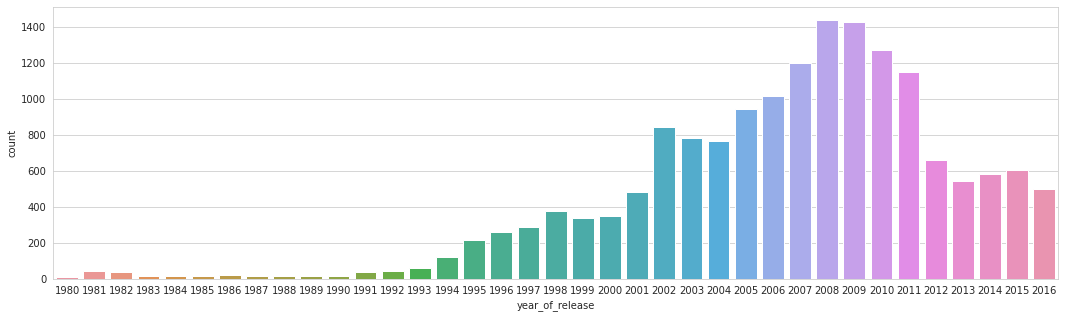

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,5))
sns.countplot(data = data, x = 'year_of_release')

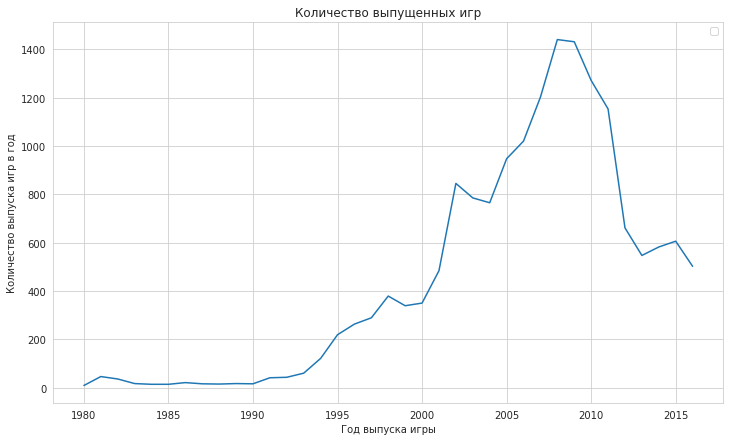

In [28]:
games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,7))
sns.lineplot(data = games_per_year)
plt.title("Количество выпущенных игр")
plt.xlabel("Год выпуска игры")
plt.ylabel("Количество выпуска игр в год")
plt.legend('');

До 1990г. количество выпускаемых игр было мало. Начиная с 1991г., наблюдается плавный рост показателей количеста выпущенных игр.
Однако, мы можем наблюдать резкий скачек показателей в 2002г., и, дейцствительно, в этом году вышлол огромное количество игр для всевозможных платформ. Количество выпускаемых игр продолжало набирать обороты до 2008г. После пошоло на спад, а в 2012г. резко упало. Данный факт можно объяснить смены вектора разработков видеоигр на игры для мобильных устройств из-за их большей популярности и доступности.

In [29]:
games_per_year_region = (
    data.groupby('year_of_release')
    .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum'})
)
fig = px.line(games_per_year_region, x=games_per_year_region.index, y=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],\
              title='Динамика продаж по регионам')
fig.show()

Данную тенденция мы можем проследить и в разрезе по регионам.

**3.2 Как менялись продажи по платформам?**

Text(0, 0.5, 'Сумма продаж')

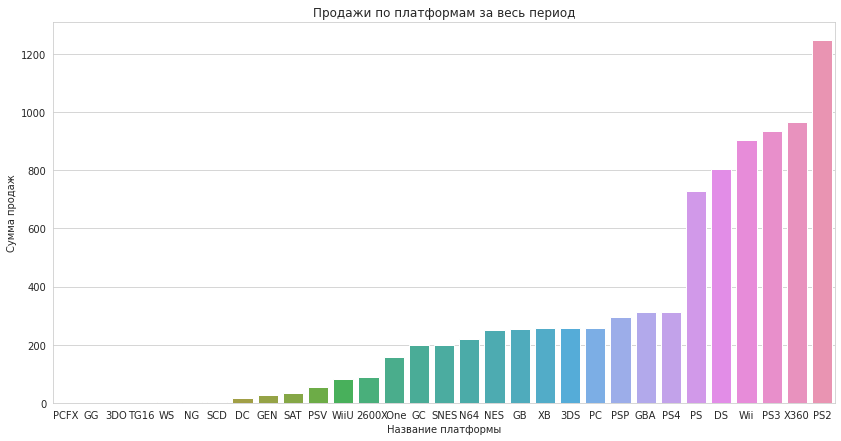

In [30]:
platform_sales = (
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales')
)
plt.figure(figsize=(14,7))
sns.barplot(x=platform_sales.index,y=platform_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Сумма продаж")

За весь исследуемый период на рынке самыми популярными по продажам платофрмы были:
1. Sony PlayStation 2
2. Xbox 360
3. Sony PlayStation 3
4. Wii
5. Nintendo DS
6. Sony PlayStation (первое поколение)

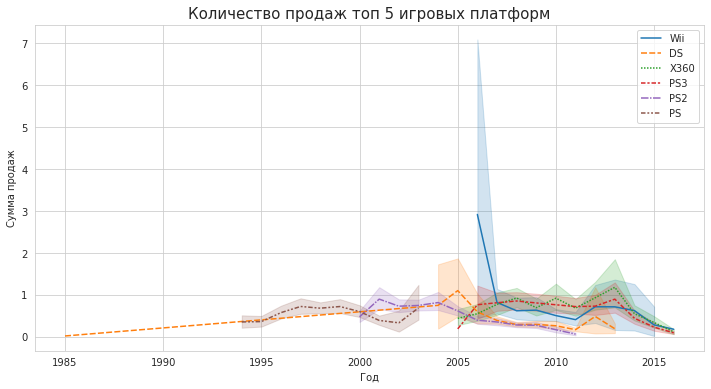

In [31]:
#рассмотрим количество продаж каждой из самых популярных платфор в динамике по годам
top_platform = data.query('platform == "PS2" | \
                          platform == "X360" | \
                          platform == "PS3" | \
                          platform == "Wii" | \
                          platform == "DS" | \
                          platform == "PS"'
                         )
line,ax = plt.subplots(figsize=(12,6))
ax = sns.lineplot(x="year_of_release", y="total_sales", data=top_platform, hue="platform", style='platform')
ax.set_title('Количество продаж топ 5 игровых платформ', fontsize=15)
ax.set_xlabel ('Год')
ax.set_ylabel ('Сумма продаж')
ax.legend (loc="upper right");


In [32]:
# Анализ выброса количества релизов на платформе 'DS' в 1985
data.loc[
    (data['platform'] == 'DS') 
    & (1985 == data['year_of_release'])
].sort_values(by='year_of_release').head(20)


name platform  year_of_release   genre  \
15818  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15818       0.0       0.0      0.02          0.0           NaN         NaN   

        rating  total_sales  
15818  Unknown         0.02

In [33]:
data = data.loc[data.index != 15818]

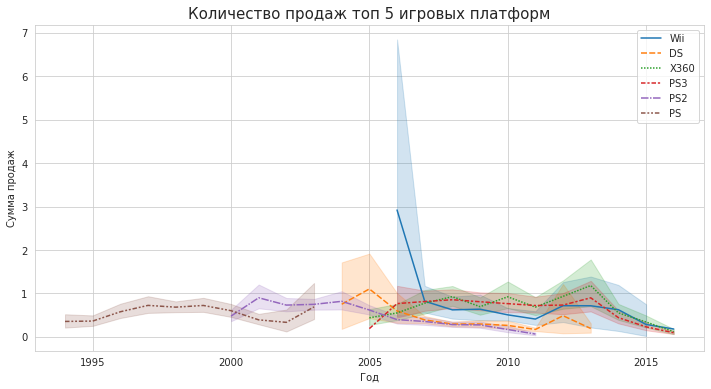

In [34]:
top_platform = data.query('platform == "PS2" | \
                          platform == "X360" | \
                          platform == "PS3" | \
                          platform == "Wii" | \
                          platform == "DS" | \
                          platform == "PS"'
                         )
line,ax = plt.subplots(figsize=(12,6))
ax = sns.lineplot(x="year_of_release", y="total_sales", data=top_platform, hue="platform", style='platform')
ax.set_title('Количество продаж топ 5 игровых платформ', fontsize=15)
ax.set_xlabel ('Год')
ax.set_ylabel ('Сумма продаж')
ax.legend (loc="upper right");

Платформа Nintendo DS, по найденным нами данным, впервые была выпущена в 2004г. в США и Японии и в 2005г. во всех остальных регионах. В данных мы можем наблюдать несоотвествующую информации строку, где дата релиза игры на платформе DS значится 1985г. Это, опредленно, являюется выбрасом, который стоить удалить из датафрейма.

Nintendo DS оставалась довольно популярной с 2004г. вплоть до 2013. Линии продаж разных поколений платформ PlayStation идут в нахлест и показывают сменяемость поколений и довольно стабильные продажи. Xbox360 держится на рынке с 2005г., ее показатели схожи с PlayStation 3,т.к. они вышли в один период. Резкое начало и в дальнейшем спад был у платформы Wii.

Сюдя по графикам, что остается неизменным - популярность платформ Sony PlayStation каждого поколения в свое время.

**3.3 Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам**

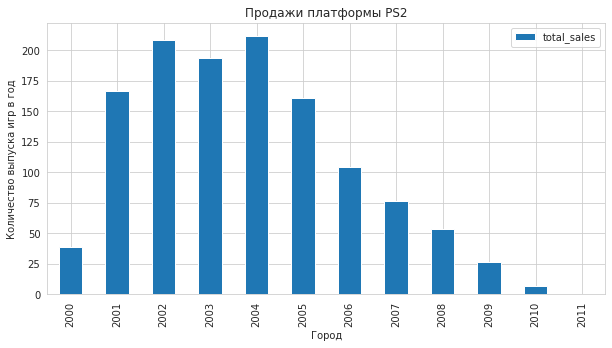

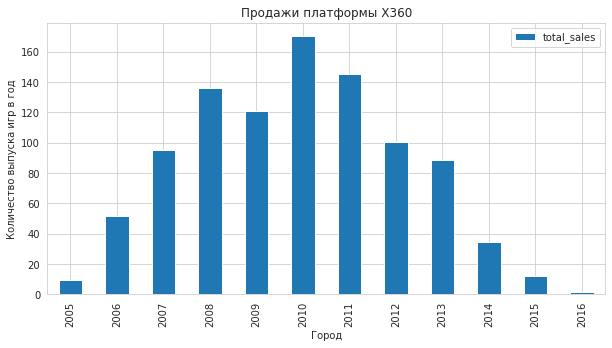

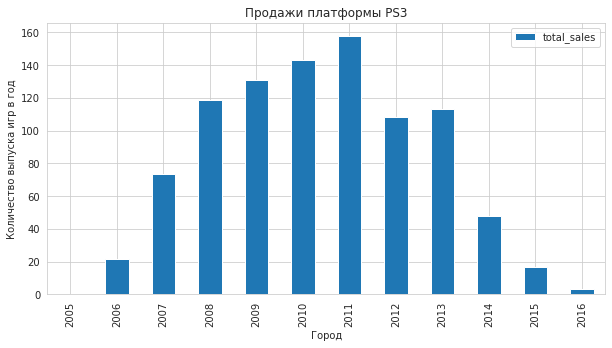

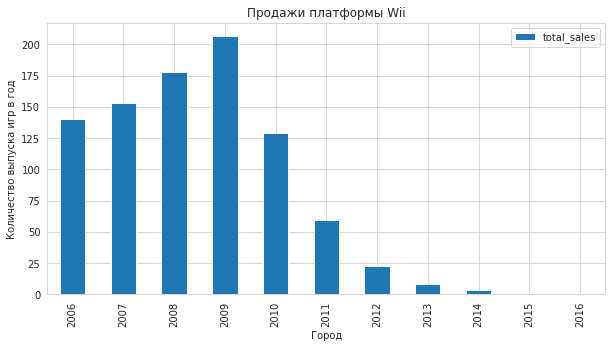

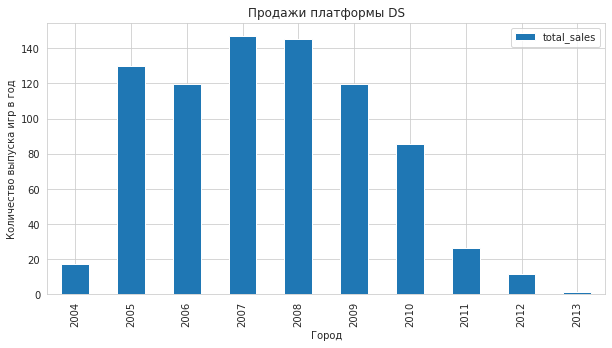

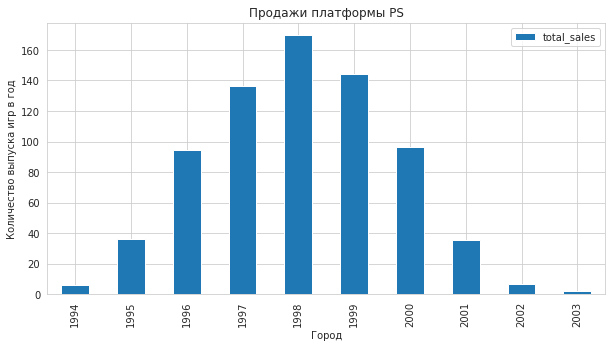

In [35]:
(top_platform
    .query('platform == "PS2"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.ylabel("Количество выпуска игр в год")
plt.xlabel("Город") 
plt.title("Продажи платформы PS2")
plt.show()

(top_platform
    .query('platform == "X360"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.ylabel("Количество выпуска игр в год")
plt.xlabel("Город") 
plt.title("Продажи платформы X360")
plt.show()

(top_platform
    .query('platform == "PS3"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.ylabel("Количество выпуска игр в год")
plt.xlabel("Город") 
plt.title("Продажи платформы PS3")
plt.show()

(top_platform
    .query('platform == "Wii"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.ylabel("Количество выпуска игр в год")
plt.xlabel("Город") 
plt.title("Продажи платформы Wii")
plt.show()

(top_platform
    .query('platform == "DS"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.ylabel("Количество выпуска игр в год")
plt.xlabel("Город") 
plt.title("Продажи платформы DS")
plt.show()

(top_platform
    .query('platform == "PS"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.ylabel("Количество выпуска игр в год")
plt.xlabel("Город") 
plt.title("Продажи платформы PS")
plt.show()

Рассматривая каждую из топ-5 платформ в динамике по годам отдельно друг от друга, мы также можем заметить приемственность поколений Sony PlayStation (вскоре после появления новой ее платформы, объем продаж старой снижается, но плавно).

Платформы Wii и DS имели большой успех в свое время, начиная с 2004г., однако, к 2014г. полностью потеряли продажи).

Большую перспективу имеют платформы нового поколения: PlayStation 4 и Xbox one. В следствие недавнего появляния их продажи еще не привысили показатели их предшественников, но, судя по тенденции, в скором постепенно возрастут.

**3.4 За какой характерный срок появляются новые и исчезают старые платформы?**

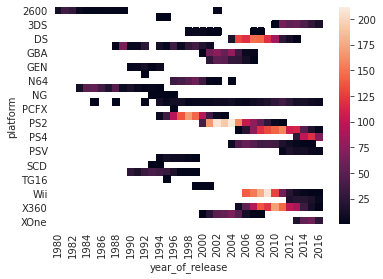

In [36]:
platform_life = data.sort_values(by='total_sales').pivot_table(
    index='platform', 
    columns='year_of_release', 
    values='total_sales', 
    aggfunc='sum'
)

sns.heatmap(platform_life);


In [37]:
life = (data.groupby('platform')['year_of_release'].max() -\
        data.groupby('platform')['year_of_release'].min()).mean()
life

7.548387096774194

Тепловая карта и данные вычисления наглядно показывают, что жизненный цикл платформы составляет  в среднем 7.5 лет.

**Актуальный период**

Актуальным периодом для работы над анализом перспектив мы можем считать период с 2012г. (Показатели за 5 предыдущих лет предположительно проявят перспективы на 2017г.)

**3.5 Создание актуального датафрейма**

In [38]:
#отберем данные за необходимый актуальный период
relevant_data = data[data['year_of_release'] >= 2012].reset_index(drop=True)

In [39]:
relevant_data

name platform  year_of_release         genre  \
0                Grand Theft Auto V      PS3             2013        Action   
1                Grand Theft Auto V     X360             2013        Action   
2         Call of Duty: Black Ops 3      PS4             2015       Shooter   
3               Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
4        Call of Duty: Black Ops II      PS3             2012       Shooter   
...                             ...      ...              ...           ...   
2893               Strawberry Nauts      PSV             2016     Adventure   
2894               Aiyoku no Eustia      PSV             2014          Misc   
2895  Samurai Warriors: Sanada Maru      PS3             2016        Action   
2896        Haitaka no Psychedelica      PSV             2016     Adventure   
2897            Winning Post 8 2016      PSV             2016    Simulation   

      na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         7.02      9.09      0.98         3.96          97.0         8.2   
1         9.66      5.14      0.06         1.41          97.0         8.1   
2         6.03      5.86      0.36         2.38           NaN         NaN   
3         5.28      4.19      4.35         0.78           NaN         NaN   
4         4.99      5.73      0.65         2.42          83.0         5.3   
...        ...       ...       ...          ...           ...         ...   
2893      0.00      0.00      0.01         0.00           NaN         NaN   
2894      0.00      0.00      0.01         0.00           NaN         NaN   
2895      0.00      0.00      0.01         0.00           NaN         NaN   
2896      0.00      0.00      0.01         0.00           NaN         NaN   
2897      0.00      0.00      0.01         0.00           NaN         NaN   

       rating  total_sales  
0           M        21.05  
1           M        16.27  
2     Unknown        14.63  
3     Unknown        14.60  
4           M        13.79  
...       ...          ...  
2893  Unknown         0.01  
2894  Unknown         0.01  
2895  Unknown         0.01  
2896  Unknown         0.01  
2897  Unknown         0.01  

[2898 rows x 12 columns]

In [40]:
#смотрим уникальные значения платформ
relevant_data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

В выбранный период на рынке были представлены игры для 11 платформ.

**3.6 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

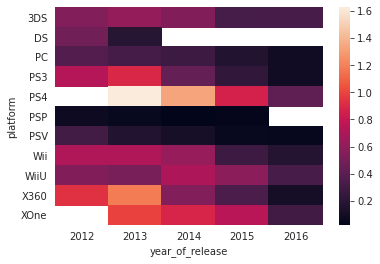

In [41]:
relevant_table = relevant_data.pivot_table(index='platform',columns='year_of_release', values='total_sales')
sns.heatmap(relevant_table);

Text(0, 0.5, 'Сумма продаж')

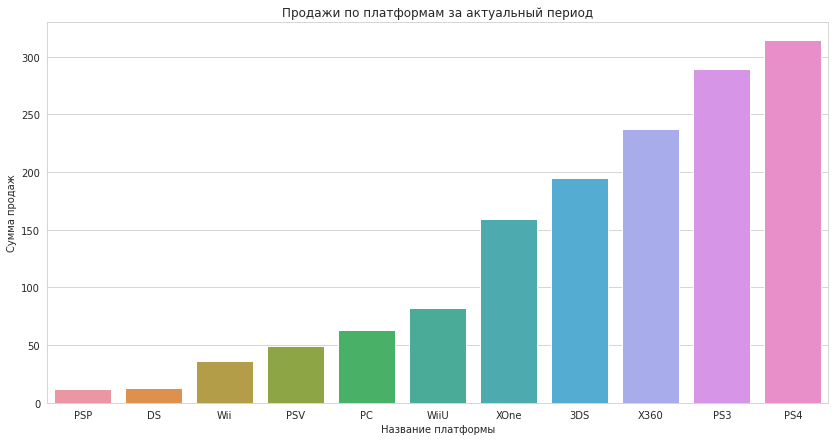

In [42]:
relevant_platform_sales = (
    relevant_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales')
)
plt.figure(figsize=(14,7));
sns.barplot(x=relevant_platform_sales.index,y=relevant_platform_sales['total_sales'])
plt.title("Продажи по платформам за актуальный период");
plt.xlabel("Название платформы")
plt.ylabel("Сумма продаж")

У всех представленных консолей продажи падают с 2014г.

Несмотря на это, лидером продаж является платформа Sony PlayStation 4, чьи продажи все же сокращаются к 2016 г. Это может предвещать скорое появления платформы PS 5 на рынке.

Конкурентной платформой для PS4 является Xbox One. Они обе являются новейшими платформами на тот период, хотя продажи Xbox One в 2 раза меньше, чем у его конкурента.

Nintendo 3DS занимает четвертое место по продажам за актуальный период. Ее продажи также падают к 2016г., но они не упали до нуля.

Продажи на консолях DS, PSP, PSV, PS3, X360, Wii в течение актуального периода и к его концу снизились до минимума. Данные консоли уже не актуальны. Их также уже нельзя считать прибыльными.

Продажи игр для платформы PC также снижаются до критических отметок. Однако, возможно, данную платформу не стоит считать неактульной. На протяжении всего времени существования персонального компьютера созавались и выпускались видеоигры. Смею предположить, что в будущем будет наблюдаться рост релизов новых игр на PC.

**3.7 «Ящик с усами» по глобальным продажам игр в разбивке по платформам**

Построение графика boxplot 

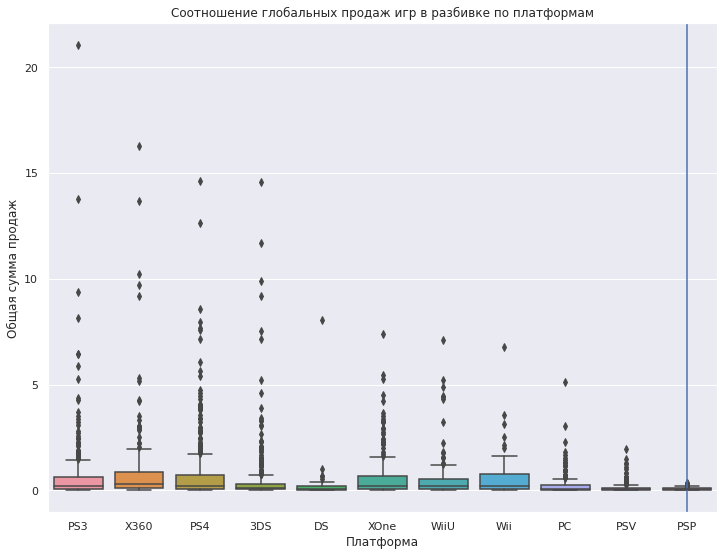

In [43]:
sns.set_theme(rc={'figure.figsize':(12,9)})
ax = sns.boxplot(
    x=relevant_data['platform'], 
    y=relevant_data['total_sales'],
);
ax.axvline(10)
plt.ylabel("Общая сумма продаж")
plt.xlabel("Платформа") 
plt.title("Соотношение глобальных продаж игр в разбивке по платформам")
plt.show()

Исходя из гистограммы рассеяния, можно заметить, что у самых продаваемых платформ имеется большое количество выбрасов. Это может быть связано с выпуском необычайно популярных и продаваемых игр. Однако, мы не можем дать оценки по средним показателям платформ, поэтому стоит построить гистограмму рассеяния без учета выбросов.

Построение графика boxplot без выбросов.

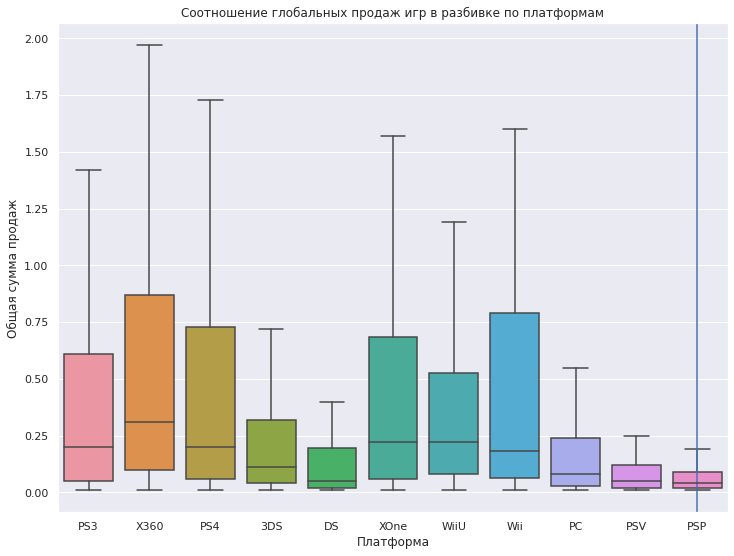

In [44]:
sns.set_theme(rc={'figure.figsize':(12,9)})
ax = sns.boxplot(
    x=relevant_data['platform'], 
    y=relevant_data['total_sales'],
    showfliers=False
);
ax.axvline(10)
plt.ylabel("Общая сумма продаж")
plt.xlabel("Платформа") 
plt.title("Соотношение глобальных продаж игр в разбивке по платформам")
plt.show()

В число платформ с максимальным числом продаж, которые преодолели отметку в 700 тыс. по третьему квартилю, входят Xbox 360, Wii и PS4. Не далеко от них расположился Xbox One.
Наиболее перспективнми  платформами с точки зрения продаж и жизненного цикла являются PS 4 и Xbox One, чей жизненный цикл начался относительно недавно и продажи которых в будущем не будут снижаться до выхода платформ нового поколениях тех же компаний.

**3.7 Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**

total_sales  critic_score  user_score
total_sales      1.000000      0.405895   -0.033625
critic_score     0.405895      1.000000    0.557654
user_score      -0.033625      0.557654    1.000000

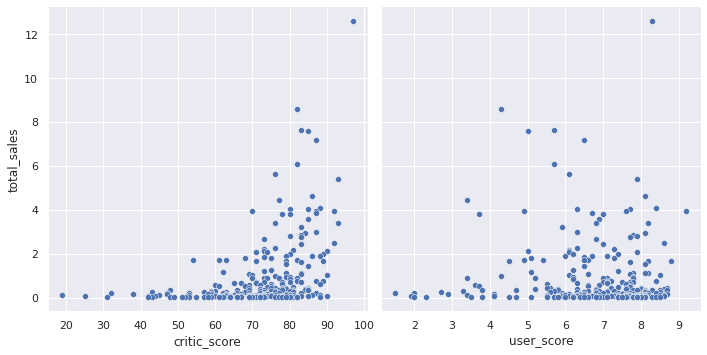

In [45]:
ps4 = (
    relevant_data.query('platform == "PS4" & critic_score >= 0 & user_score >= 0')
    .loc[:,['total_sales', 'critic_score', 'user_score']]
)
display(ps4.corr())
sns.pairplot(
    ps4,
    x_vars=["critic_score", "user_score"],
    y_vars=["total_sales"],
    height=5,
    
);

В качестве самой популярной платформы на актульный период была выбрана самая продаваемая платформа PS 4. 

Корреляция между продажами игр на данной платформе и оценкой игры критиками умеренная (0.4). 

Корреляция между продажами игр на данной платформе и оценкой игры пользователями слабая отрицательная (-0.03).

Таким образом, оценка критиков не сильно влияет на продажи игры, не наблюдается прямой зависимости продаж от оценки. Оценка пользователей, можно считать, почти никак не вляет на продажи игры в целом.

**3.8 Соотнесите выводы с продажами игр на других платформах**

total_sales  critic_score  user_score
platform                                                    
3DS      total_sales      1.000000      0.310311    0.202842
         critic_score     0.310311      1.000000    0.721517
         user_score       0.202842      0.721517    1.000000
DS       total_sales           NaN           NaN         NaN
         critic_score          NaN           NaN         NaN
         user_score            NaN           NaN         NaN
PC       total_sales      1.000000      0.239384   -0.135287
         critic_score     0.239384      1.000000    0.431879
         user_score      -0.135287      0.431879    1.000000
PS3      total_sales      1.000000      0.333607    0.001252
         critic_score     0.333607      1.000000    0.544587
         user_score       0.001252      0.544587    1.000000
PSP      total_sales           NaN           NaN         NaN
         critic_score          NaN           NaN         NaN
         user_score            NaN           NaN         NaN
PSV      total_sales      1.000000      0.093988    0.013902
         critic_score     0.093988      1.000000    0.699199
         user_score       0.013902      0.699199    1.000000
Wii      total_sales      1.000000     -0.405997   -0.054722
         critic_score    -0.405997      1.000000    0.780222
         user_score      -0.054722      0.780222    1.000000
WiiU     total_sales      1.000000      0.350882    0.391848
         critic_score     0.350882      1.000000    0.770080
         user_score       0.391848      0.770080    1.000000
X360     total_sales      1.000000      0.360266   -0.002257
         critic_score     0.360266      1.000000    0.557952
         user_score      -0.002257      0.557952    1.000000
XOne     total_sales      1.000000      0.410422   -0.094003
         critic_score     0.410422      1.000000    0.472462
         user_score      -0.094003      0.472462    1.000000

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



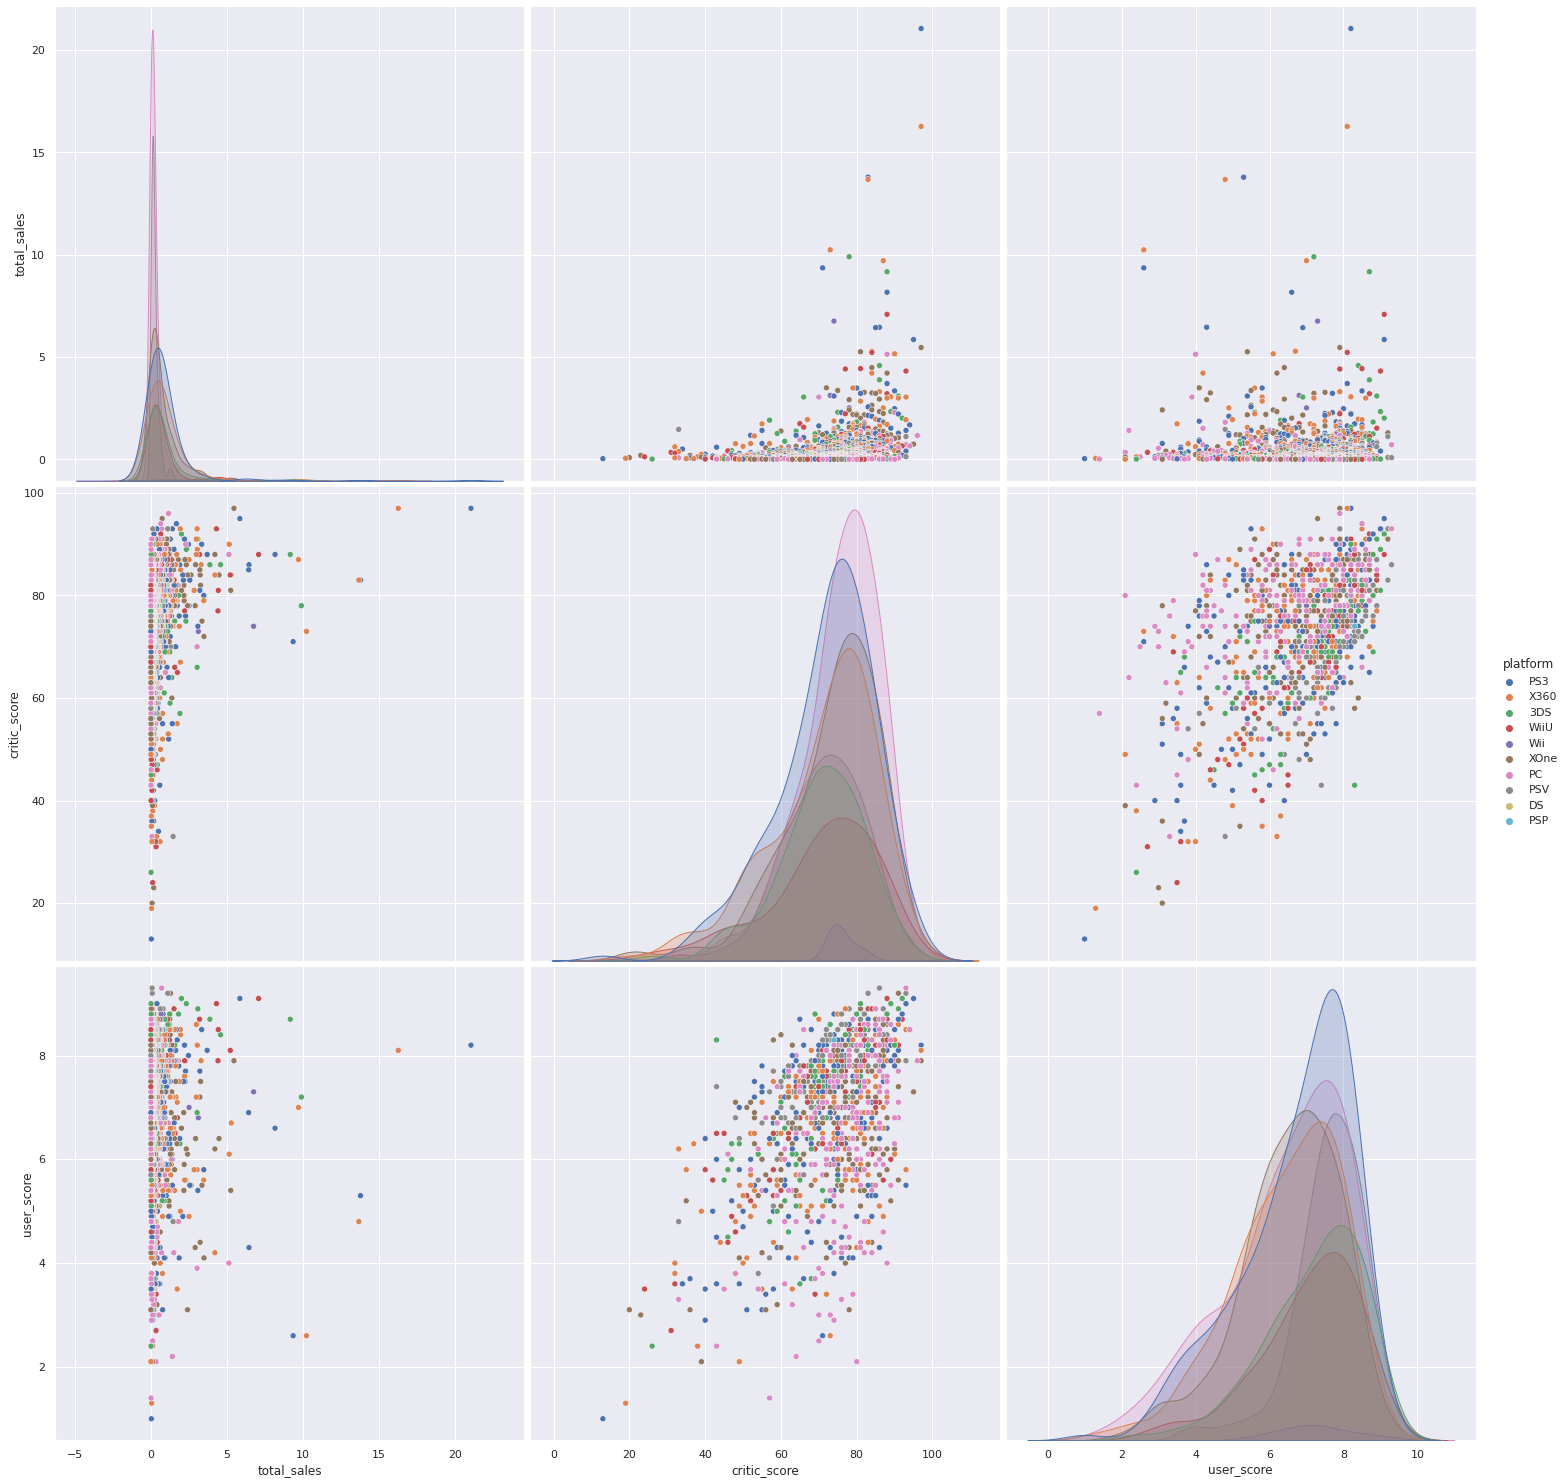

In [46]:
other_platforms = (
    relevant_data.query('platform != "PS4" & critic_score >= 0 & user_score >= 0')
    .loc[:,['platform', 'total_sales', 'critic_score', 'user_score']]
)
display(other_platforms.groupby('platform').corr())
sns.pairplot(other_platforms, hue="platform", height=7)

У всех остальных платформ ситуация скаладывается похожим образом. Оценка критиков незначительно влияет на продажи, в то время как оценка пользователей не оказывает влияния.

**3.9 Общее распределение игр по жанрам**

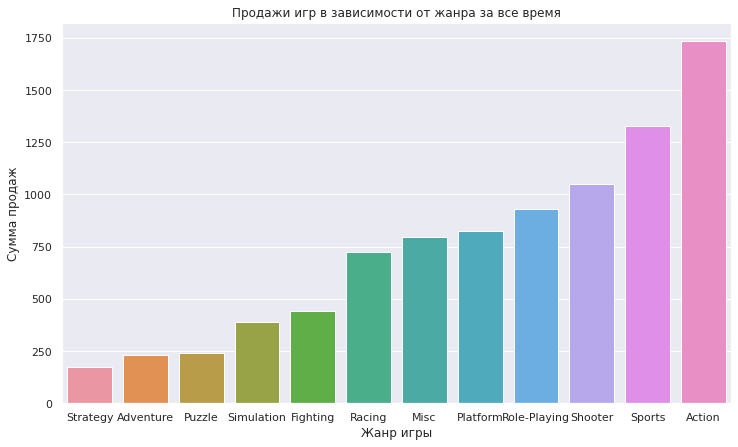

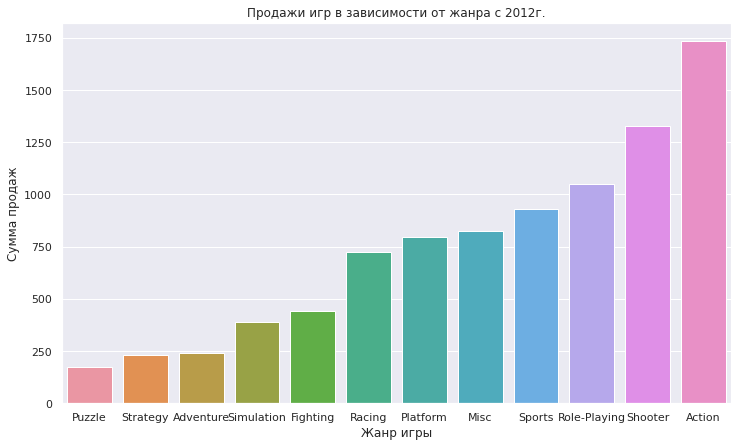

In [47]:
top_genre = (
    data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales')
)
plt.figure(figsize=(12,7))
sns.barplot(x=top_genre.index,y=top_genre['total_sales']);
plt.title("Продажи игр в зависимости от жанра за все время")
plt.xlabel("Жанр игры")
plt.ylabel("Сумма продаж")
plt.show()

top_genre_relevant = (
    relevant_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales')
)
plt.figure(figsize=(12,7))
sns.barplot(x=top_genre_relevant.index,y=top_genre['total_sales']);
plt.title("Продажи игр в зависимости от жанра с 2012г.")
plt.xlabel("Жанр игры")
plt.ylabel("Сумма продаж")
plt.show()

In [48]:
relevant_data.rename(columns={
    'genre':'Жанр'
}).pivot_table(
    index='Жанр',
    values='total_sales',
    aggfunc=('count', 'mean', 'median', 'sum')
).rename(columns={
    'count':'Количество релизов',
    'mean':'Среднее продаж',
    'median':'Медиана продаж',
    'sum':'Сумма млн. продаж',
}).sort_values(by='Сумма млн. продаж', ascending=False)

Количество релизов  Среднее продаж  Медиана продаж  \
Жанр                                                               
Action                      1041        0.428828           0.120   
Shooter                      237        1.285865           0.430   
Role-Playing                 370        0.521081           0.140   
Sports                       267        0.678165           0.240   
Misc                         193        0.441865           0.120   
Platform                      85        0.717647           0.210   
Racing                       115        0.465217           0.140   
Fighting                     109        0.408165           0.130   
Simulation                    80        0.439000           0.120   
Adventure                    302        0.097450           0.030   
Strategy                      71        0.187887           0.080   
Puzzle                        28        0.174643           0.045   

              Сумма млн. продаж  
Жанр                             
Action                   446.41  
Shooter                  304.75  
Role-Playing             192.80  
Sports                   181.07  
Misc                      85.28  
Platform                  61.00  
Racing                    53.50  
Fighting                  44.49  
Simulation                35.12  
Adventure                 29.43  
Strategy                  13.34  
Puzzle                     4.89

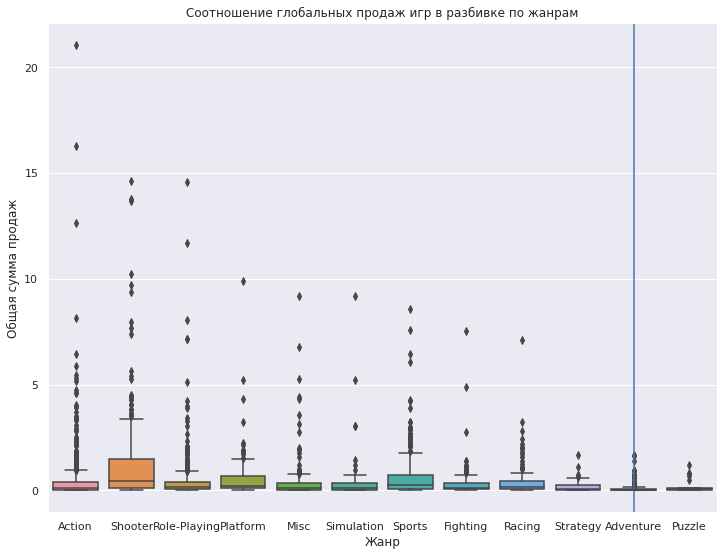

In [49]:
sns.set_theme(rc={'figure.figsize':(12,9)})
ax = sns.boxplot(
    x=relevant_data['genre'], 
    y=relevant_data['total_sales'],
);
ax.axvline(10)
plt.ylabel("Общая сумма продаж")
plt.xlabel("Жанр") 
plt.title("Соотношение глобальных продаж игр в разбивке по жанрам")
plt.show()

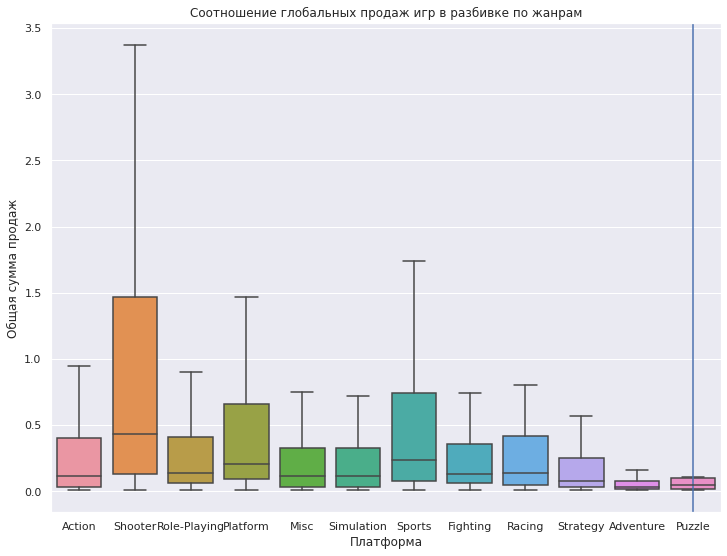

In [50]:
sns.set_theme(rc={'figure.figsize':(12,9)})
ax = sns.boxplot(
    x=relevant_data['genre'], 
    y=relevant_data['total_sales'],
    showfliers=False
);
ax.axvline(11)
plt.ylabel("Общая сумма продаж")
plt.xlabel("Платформа") 
plt.title("Соотношение глобальных продаж игр в разбивке по жанрам")
plt.show()

Самыми продаваемые жанрами игр за весь период являются: Action, Sports, Shooter, Role-playing и Platform.

Самыми прибыльными играми по данными за актуальный период являются Shooter, Platform и Sports. Данные жанры игр стабильно приносят высокий по отношению к другим жанрам доход.

По числу выпущенных игр и общей сумме продаж лидируют также Action, Role-playing и Misc. Однако, их продажи трудно назвать стабильными, хотя они и пользуются популярностью.

Самой низкой показателями продаж обладают игры в жанре Puzzle, Stragedy и Adventure.

### Шаг 4. Портрет пользователя для каждого региона

**4.1 Самые популярные платформы (топ-5)**

platform
X360    140.57
PS4     108.74
PS3     103.74
XOne     93.12
3DS      55.49
WiiU     38.10
PC       19.26
Wii      18.14
PSV      10.98
DS        4.93
PSP       0.23
Name: na_sales, dtype: float64

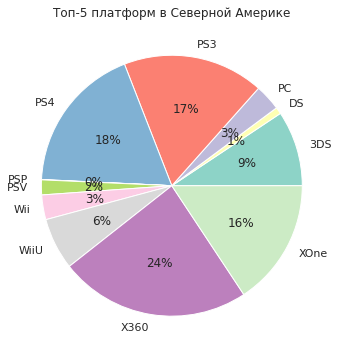

platform
PS4     141.09
PS3     107.27
X360     74.89
XOne     51.59
3DS      42.83
PC       38.38
WiiU     25.13
Wii      12.34
PSV      11.36
DS        3.78
PSP       0.52
Name: eu_sales, dtype: float64

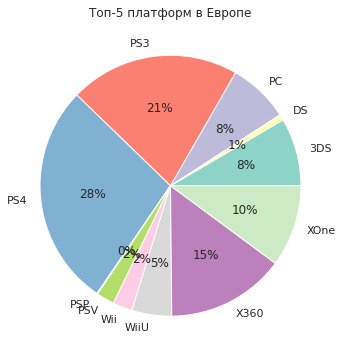

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
PSP     10.71
DS       3.72
Wii      3.39
X360     1.57
XOne     0.34
PC       0.00
Name: jp_sales, dtype: float64

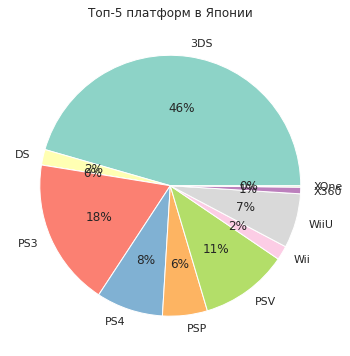

In [51]:
na_platform = relevant_data.groupby('platform')['na_sales'].sum()
eu_platform = relevant_data.groupby('platform')['eu_sales'].sum()
jp_platform = relevant_data.groupby('platform')['jp_sales'].sum()

display(na_platform.sort_values(ascending=False))
na_platform.plot(kind='pie', y='na_sales', ylabel='', autopct='%1.0f%%', figsize=(6, 6), colors=plt.cm.Set3.colors)
plt.title("Топ-5 платформ в Северной Америке")
plt.show()

display(eu_platform.sort_values(ascending=False))
eu_platform.plot(kind='pie', y='eu_sales', ylabel='', autopct='%1.0f%%', figsize=(6, 6), colors=plt.cm.Set3.colors)
plt.title("Топ-5 платформ в Европе")
plt.show()

display(jp_platform.sort_values(ascending=False))
jp_platform.plot(kind='pie', y='jp_sales', ylabel='', autopct='%1.0f%%', figsize=(6, 6), colors=plt.cm.Set3.colors)
plt.title("Топ-5 платформ в Японии")
plt.show()

Самой популярной платформой в Северной Америке является Xbox360 (24%). Далее идут PS4 (18%), PS3(17%) и XOne(16%).

Самой популярной платформой в Европе является таже PS 4 (28%). Далее идут PS3 (21%), Xbox360(15%) и XOne(10%).

Самой популярной платформой в Японии является 3DS (46%). Далее идут PS3 (18%), PSV(11%) и PS4(8%). 

**4.2 Самые популярные жанры (топ-5)**

genre
Action          180.15
Shooter         144.79
Sports           81.53
Role-Playing     64.00
Misc             38.19
Platform         25.38
Fighting         19.79
Racing           17.22
Adventure         8.92
Simulation        7.97
Strategy          4.23
Puzzle            1.13
Name: na_sales, dtype: float64

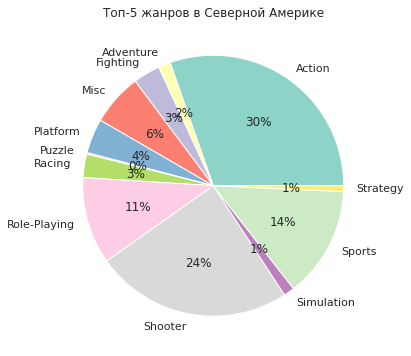

genre
Action          161.70
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Misc             26.32
Platform         21.41
Simulation       14.55
Fighting         10.79
Adventure         9.46
Strategy          5.17
Puzzle            1.40
Name: eu_sales, dtype: float64

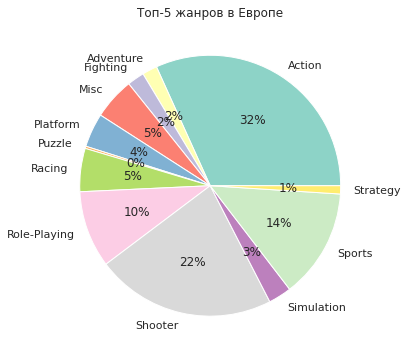

genre
Role-Playing    65.44
Action          52.80
Misc            13.10
Simulation      10.41
Fighting         9.44
Shooter          9.23
Platform         8.63
Adventure        8.24
Sports           8.01
Strategy         2.88
Racing           2.50
Puzzle           2.14
Name: jp_sales, dtype: float64

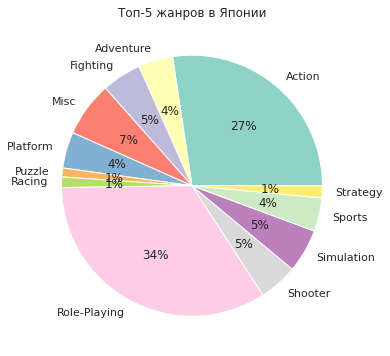

In [52]:
na_platform = relevant_data.groupby('genre')['na_sales'].sum()
eu_platform = relevant_data.groupby('genre')['eu_sales'].sum()
jp_platform = relevant_data.groupby('genre')['jp_sales'].sum()

display(na_platform.sort_values(ascending=False))
na_platform.plot(kind='pie', y='na_sales', ylabel='', autopct='%1.0f%%', figsize=(6, 6), colors=plt.cm.Set3.colors)
plt.title("Топ-5 жанров в Северной Америке")
plt.show()

display(eu_platform.sort_values(ascending=False))
eu_platform.plot(kind='pie', y='eu_sales', ylabel='', autopct='%1.0f%%', figsize=(6, 6), colors=plt.cm.Set3.colors)
plt.title("Топ-5 жанров в Европе")
plt.show()

display(jp_platform.sort_values(ascending=False))
jp_platform.plot(kind='pie', y='jp_sales', ylabel='', autopct='%1.0f%%', figsize=(6, 6), colors=plt.cm.Set3.colors)
plt.title("Топ-5 жанров в Японии")
plt.show()

Самым популярным жанром в Северной Америке является Action (30%). Далее идут Shooter (24%), Sports(14%) и Role-playing(11%).

Самым популярным жанром в Европе является таже Action (32%). Далее идут Shooter (22%), Sports(14%) и Role-playing(10%).

Самым популярным жанром в Японии является Role-playing(34%). Далее идет Action (27%). Остальные почти в равной степени продаваемы.

**4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [53]:
rating_corr = relevant_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

display(rating_corr)

fig = px.line(rating_corr, x=rating_corr.index, y=['na_sales', 'eu_sales', 'jp_sales'],\
              title='Динамика продаж в зависимости от рейтинга').update_layout(xaxis_title="Рейтинг", yaxis_title="Продажи")

fig.show()

eu_sales  jp_sales  na_sales
rating                               
E          113.03     28.33    114.37
E10+        57.25      8.19     77.93
M          194.44     21.20    231.67
T           52.96     26.02     66.02
Unknown     91.50    109.08    103.31

В Северной Америке и Европе рейтинг игры определенно оказывает влияние на количество проданных игр. Так, наибольшей популярностью обладают игры с рейтингом M («Для взрослых»).

В Японии не прослеживается сильное влияние известного нам рейтинга на продажи. Игры с рейтингом E («Для всех») и T («Подросткам») немного больше набирают количество продаж в сравнении с другими. Игры с неизвестным рейтингом определенно выбиваются из общей картины.

**Обобщенные портреты пользователей каждого региона**

В Северной Америке пользователь предпочитает платформу Xbox360 или PS4, на которой играет в игры жанра Action с рейтингом M («Для взрослых»).

В Европе пользователь также предпочитает платформу PS4, на которой играет в игры жанра Action с рейтингом M («Для взрослых»).

В Японии пользователь предпочитает платформу 3DS, на которой играет в игры жанра Role-playing или Action с рейтингом E («Для всех») и T («Подросткам»).

### Шаг. 5 Проверка гипотез

**Гипотеза №1**

Нулевая и альтернативная гипотезы:

H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 - Средние пользовательские рейтинги платформ Xbox One и PC отличаются

Для проверки гипотезы применим о равенстве средних двух неравных генеральных совокупностей t-критерий Стьюдента.
Определим пороговое значение p-value = 0.05

In [54]:
xbox = relevant_data.query('platform == "XOne" & user_score >= 0')['user_score']
pc = relevant_data.query('platform == "PC" & user_score >= 0')['user_score']

print('Масштаб выборки для платформы XboxOne:', len(xbox))
display(xbox.describe())
print('Масштаб выборки для платформы PC:', len(pc))
display(pc.describe())

Масштаб выборки для платформы XboxOne: 182


count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

Масштаб выборки для платформы PC: 211


count    211.000000
mean       6.445498
std        1.657455
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

In [55]:
alpha = 0.05

results = st.ttest_ind(
    xbox, 
    pc, 
    equal_var=False
)
print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.6206366351489678
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу не получилось отвергнуть. Следовательно, можно полагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Возможно, набор игр предоставляемых на данных платформах схож, следовательно и оценки пользователей тажке могут совпадать.

**Гипотеза №2**

Нулевая и альтернативная гипотезы:

H0 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)  одинаковые

H1 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Для проверки гипотезы применим о равенстве средних двух неравных генеральных совокупностей t-критерий Стьюдента.
Определим пороговое значение p-value = 0.05

In [56]:
action = relevant_data.query('genre == "Action" & user_score >= 0')['user_score']
sports = relevant_data.query('genre == "Sports" & user_score >= 0')['user_score']

print('Масштаб выборки для жанра Action:', len(action))
display(action.describe())
print('Масштаб выборки для жанра Sports:', len(sports))
display(sports.describe())

Масштаб выборки для жанра Action: 531


count    531.000000
mean       6.834275
std        1.371830
min        1.600000
25%        6.250000
50%        7.200000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

Масштаб выборки для жанра Sports: 194


count    194.000000
mean       5.455670
std        1.743142
min        0.200000
25%        4.300000
50%        5.750000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

In [57]:
alpha = 0.05

results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False
)
print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.3183730691020093e-20
Отвергаем нулевую гипотезу


Нулевая гипотеза была отвергнута. Можно полагать, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. То есть пользователи по разному оценивают игры в данных жанрах.

### Общий вывод

В ходе проведения исследования для интернет-магазина «Стримчик» было выполнено:
1. Загрука данных:
- импортированы необходимые библиотеки 
- загружен и прочтен датафрейм (16715 записей)
- данные нуждаются в предобработке
2. Предобработка данных:
- изменены названия столбцов
- преобразованы данные в нужные типы данных
- обработаны пропуски и дубликаты
- посчитана и добавлена сумма продаж во всех регионах
3. Исследовательский анализ данных:
- больше всего игр было продано с 2006г. по 2011г., с 2010г. продажи пошли на спад, но держатся на отметке около 600млн.
- наибольшая сумма продаж за весь период была у платформы PS2
- жизненный цикл платформ составляет в среднем 8 лет
- актуальный период для исследования был определен и начинается с 2012г.
- лидируют по продажам в актуальный период платформы PS4, PS3 и Xbox 360
- потенциально прибыльные платформы PS4 и Xbox One
- отзывы критиков средне влияют на продажи игр - не всегда хорошо продаваемая игра обладает высокой оценкой критиков
- отзывы пользователей не оказывают влияния
- самыми прибыльными играми по данными за актуальный период являются Shooter, Platform и Sports (данные жанры игр стабильно приносят высокий по отношению к другим жанрам доход)
- по числу выпущенных игр и общей сумме продаж лидируют также Action, Role-playing и Misc (однако, их продажи трудно назвать стабильными, хотя они и пользуются популярностью)
- самой низкой показателями продаж обладают игры в жанре Puzzle, Stragedy и Adventure.
4. Портрет пользователя для каждого региона:
- в Северной Америке пользователь предпочитает платформу Xbox360 или PS4, на которой играет в игры жанра Action с рейтингом M («Для взрослых»)
- в Европе пользователь также предпочитает платформу PS4, на которой играет в игры жанра Action с рейтингом M («Для взрослых»)
- в Японии пользователь предпочитает платформу 3DS, на которой играет в игры жанра Role-playing или Action с рейтингом E («Для всех») и T («Подросткам»)
5. Проверка гипотез:
-  можно полагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Возможно, набор игр предоставляемых на данных платформах схож, следовательно и оценки пользователей тажке могут совпадать
- можно полагать, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. То есть пользователи по разному оценивают игры в данных жанрах.

Интернет-магазину "Стримчик" можно дать следующие рекомендации:
- перспективно хорошо продаваемыми играми будут те, которые будут выпускаться на платформах PS4 и XBOX ONE
- также стоит брать во внимание платформу PC, в ближайшее время она не должна устареть и потерять релевантность, т.к. пользователи, играющие на персональных компьютер составляют тоже большую часть геймеров, однако, прибыль с нее может быть не так велика
- в качестве основных игр для продажи и рекламы стоит выбирать игры жанров Shooter и Sport (как самые стабильные по прибыли платформы), тажк можно добавлять в каталог самые многочисленные и популярные жанры такие, как Action или Role-playing (их доход не так стабилен и предсказуем)
- предпочитаемо будет продавать игры с рейтингом "М" ("для взрослых")
- следуюет сделать ставку на пользователей из Северной Америки и Европы: лидирующие характеристики популярных игр в данных регионах совпадают, и регионы обладают большой площадью охвата
- может оказаться не выгодным продавать только игры с хорошей оценкой пользователей, но можно обратить внимание на оценку критиков, однако, это не гарант успеха.